# Vehicle Dataset Analysis

## 1. Data Loading and Cleaning
The dataset contained approximately 18,500 entries and 141 columns. The column `uniqueid` was used as the vehicle identifier. and data was collected from 2 March 2024 to 20 April 2024.

### Data Cleaning Steps:
1. **Removed Empty Columns:** Created a separate dataframe excluding entirely empty columns to preserve the original data.
3. **Date Format:** Time-stamp was in unix-format so converted it into "dd-mm-yyyy" format.
2. **Handled Missing Values:** Used KNNImputer to fill in missing values.
3. **Outlier Removal:** Bound outliers to the 25th and 75th percentiles.
3. **Duplicate:** There were no duplicated in the data.

## 2. Exploratory Data Analysis
### Observations and Findings

#### High Correlations:
- **Engine Load and Engine Torque Percent:** High correlation indicating they are closely related to engine performance.
- **RPM and Vehicle Speed:** Moderate to strong positive correlation, as higher RPM usually means higher speed.
- **Fuel Consumption with Engine Load or Torque:** Strong positive correlation, as fuel consumption increases with engine load and torque.

#### Negative Correlations:
- **Fuel Economy with Engine Load or RPM:** Higher engine load and RPM negatively affect fuel economy.
- **Accelerator Pedal Position and Fuel Economy:** Harder pedal press decreases fuel economy.

#### Zero or Undefined Correlations:
- **Engine Oil Temp, Engine Fuel Temp, and Vibration Status:** May have no significant correlation with other variables due to constant values.

#### Low or No Correlations:
- **Latitude and Longitude vs. Performance Metrics:** GPS coordinates may not show strong correlations with performance-related data.

### Analysis Visualizations:
1. **Correlation Matrix:** Generated to understand relationships between variables.
2. **Heatmap:** Plotted to visually represent the correlation matrix.
3. **Scatter Plots:** Used to validate findings from the correlation matrix.
4. **Box Plots:** Identified outliers in the data.

## 3. Feature Engineering
### New Features Created:
1. **Distance:** Calculated from latitude and longitude readings.
2. **Low AdBlue Level:** Indicator of AdBlue levels.
3. **Over-Speeding:** Instances of speeding beyond a set threshold.
4. **Low Fuel Level:** Indicator of low fuel levels.

## 4. Deriving Insights and Generating Report

### Vehicle Statistics
- **Sample Report**
- **Vehicle ID:** it_220403501
- **Distance Travelled:** 170,095.48 km
- **Fuel Consumed:** 3,123.5 liters
- **Run-Time:** 316.25 hrs
- **Average Distance Travelled Per Unit:** 54.46 km
- **Average AdBlue Level:** 78.36
- **Average Coolant Temperature:** 85.47
- **Average Speed:** 33.36 units
- **Number of time Vehicle is Parked**: 1627

### Warnings
- **Over-Speeding Instances:** 318 times
- **Low Fuel Levels:** 2,106 times
- **Low AdBlue Levels:** 148 times


In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Data loading and preparation

In [94]:
url = r"C:/Users/welcome/Desktop/TaabiMobility/VehicleDataset.xlsx"
data = pd.read_excel(url)

In [95]:
#Checking Dimmensions of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 141 entries, uniqueid to adblue_level
dtypes: float64(122), int64(13), object(6)
memory usage: 19.8+ MB


In [96]:
#Understanding the Structure of dataset
data.describe()

,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,intakeairtemp,...,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
count,1.843400e+04,18434.000000,18434.000000,0.0,0.0,18434.000000,0.0,0.0,18434.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14770.000000
mean,1.711641e+09,18.724254,78.865351,NaN,NaN,38.141206,NaN,NaN,84.571336,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.795315
std,1.275937e+06,0.816184,3.208032,NaN,NaN,29.889358,NaN,NaN,7.718346,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.571199
min,1.709341e+09,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,30.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.400000
25%,1.710903e+09,18.701308,78.758909,NaN,NaN,10.000000,NaN,NaN,83.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.800000
50%,1.711692e+09,18.853032,79.092408,NaN,NaN,31.000000,NaN,NaN,85.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.400000
75%,1.712682e+09,18.921385,79.352821,NaN,NaN,64.000000,NaN,NaN,89.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.200000
max,1.713636e+09,19.069500,79.481804,NaN,NaN,100.000000,NaN,NaN,98.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [97]:
#Checking are there any columns which are entirely empty 
data.isnull().all()

uniqueid                         False
ts                               False
lat                              False
lng                              False
external_bat_voltage              True
                                 ...  
boost_pressure                    True
intake_manifold_1_temperature     True
air_inlet_pressure                True
exhaust_gas_temperature           True
adblue_level                     False
Length: 141, dtype: bool

# Data Cleaning

In [98]:
#Retrieveing Empty-Columns and Storing them in a list for futher reference
empty_columns = data.columns[data.isnull().all()].tolist()  # Columns where all values are NaN
non_empty_columns = data.columns[~data.isnull().all()].tolist()  # Columns where not all values are NaN

In [99]:
#Creating dataframe excluding the empty-columns
operational_data = data[non_empty_columns]

In [100]:
#Checking the dimmensions of newly created dataframe which have non-empty columns stored in it
operational_data.info()
#It should have same number of rows as the number of rows in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   uniqueid                              18434 non-null  object 
 1   ts                                    18434 non-null  int64  
 2   lat                                   18434 non-null  float64
 3   lng                                   18434 non-null  float64
 4   engineload                            18434 non-null  int64  
 5   coolant                               18434 non-null  int64  
 6   engineoiltemp                         18434 non-null  float64
 7   vehiclespeed                          18434 non-null  float64
 8   rpm                                   18434 non-null  float64
 9   obddistance                           18434 non-null  int64  
 10  runtime                               18420 non-null  float64
 11  engine_torque_p

In [144]:
# ts (timestamp) was in unix format this function converts unix to dd-mm-yyyy format
def convert_timestamp(ts_value):
    # Check if the value is a string (already formatted date)
    if isinstance(ts_value, str):
        try:
            # Try parsing the string into datetime
            return pd.to_datetime(ts_value, format='%d-%m-%Y')
        except ValueError:
            return np.nan  # In case of an invalid format, return NaN
    else:
        # If it's a numeric value (Unix timestamp)
        return pd.to_datetime(ts_value, unit='s')

# Apply the conversion function to the 'ts' column
operational_data.loc[:, 'ts_converted'] = operational_data['ts'].apply(convert_timestamp)

# Check the result
operational_data['ts_converted']

0       2024-03-02 00:52:11
1       2024-03-02 00:53:14
2       2024-03-02 00:54:17
3       2024-03-02 00:55:20
4       2024-03-02 00:56:23
                ...        
18429   2024-04-20 17:57:45
18430   2024-04-20 17:58:49
18431   2024-04-20 17:59:53
18432   2024-04-20 18:00:56
18433   2024-04-20 18:02:00
Name: ts_converted, Length: 18434, dtype: datetime64[ns]


In [102]:
#Checking for Missing Values
operational_data.isnull().sum()

uniqueid                                   0
ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
engineoiltemp                              0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
selected_gear                              0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
pluscode                                   0
vibration_status                           0
can_raw_da

In [103]:
#Handling Missing Values
impute = KNNImputer()

# Select numerical columns in the DataFrame
numerical_columns = operational_data.select_dtypes(include="number").columns
operational_data.loc[:, numerical_columns] = impute.fit_transform(operational_data[numerical_columns])

In [104]:
#Checking if there are still any missing values in data
operational_data.isnull().sum()

uniqueid                                0
ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
engineoiltemp                           0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
selected_gear                           0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
pluscode                                0
vibration_status                        0
can_raw_data                            0
engine_throttle_valve1_pos        

In [105]:
# Check for duplicate rows in the entire DataFrame
operational_data.duplicated().sum()

0

# Exploratory data analysis

### Plotting heatmap for describing the correlation

In [106]:
# Separate numerical data
numerical_data = operational_data.select_dtypes(include="number")

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr().fillna(0)

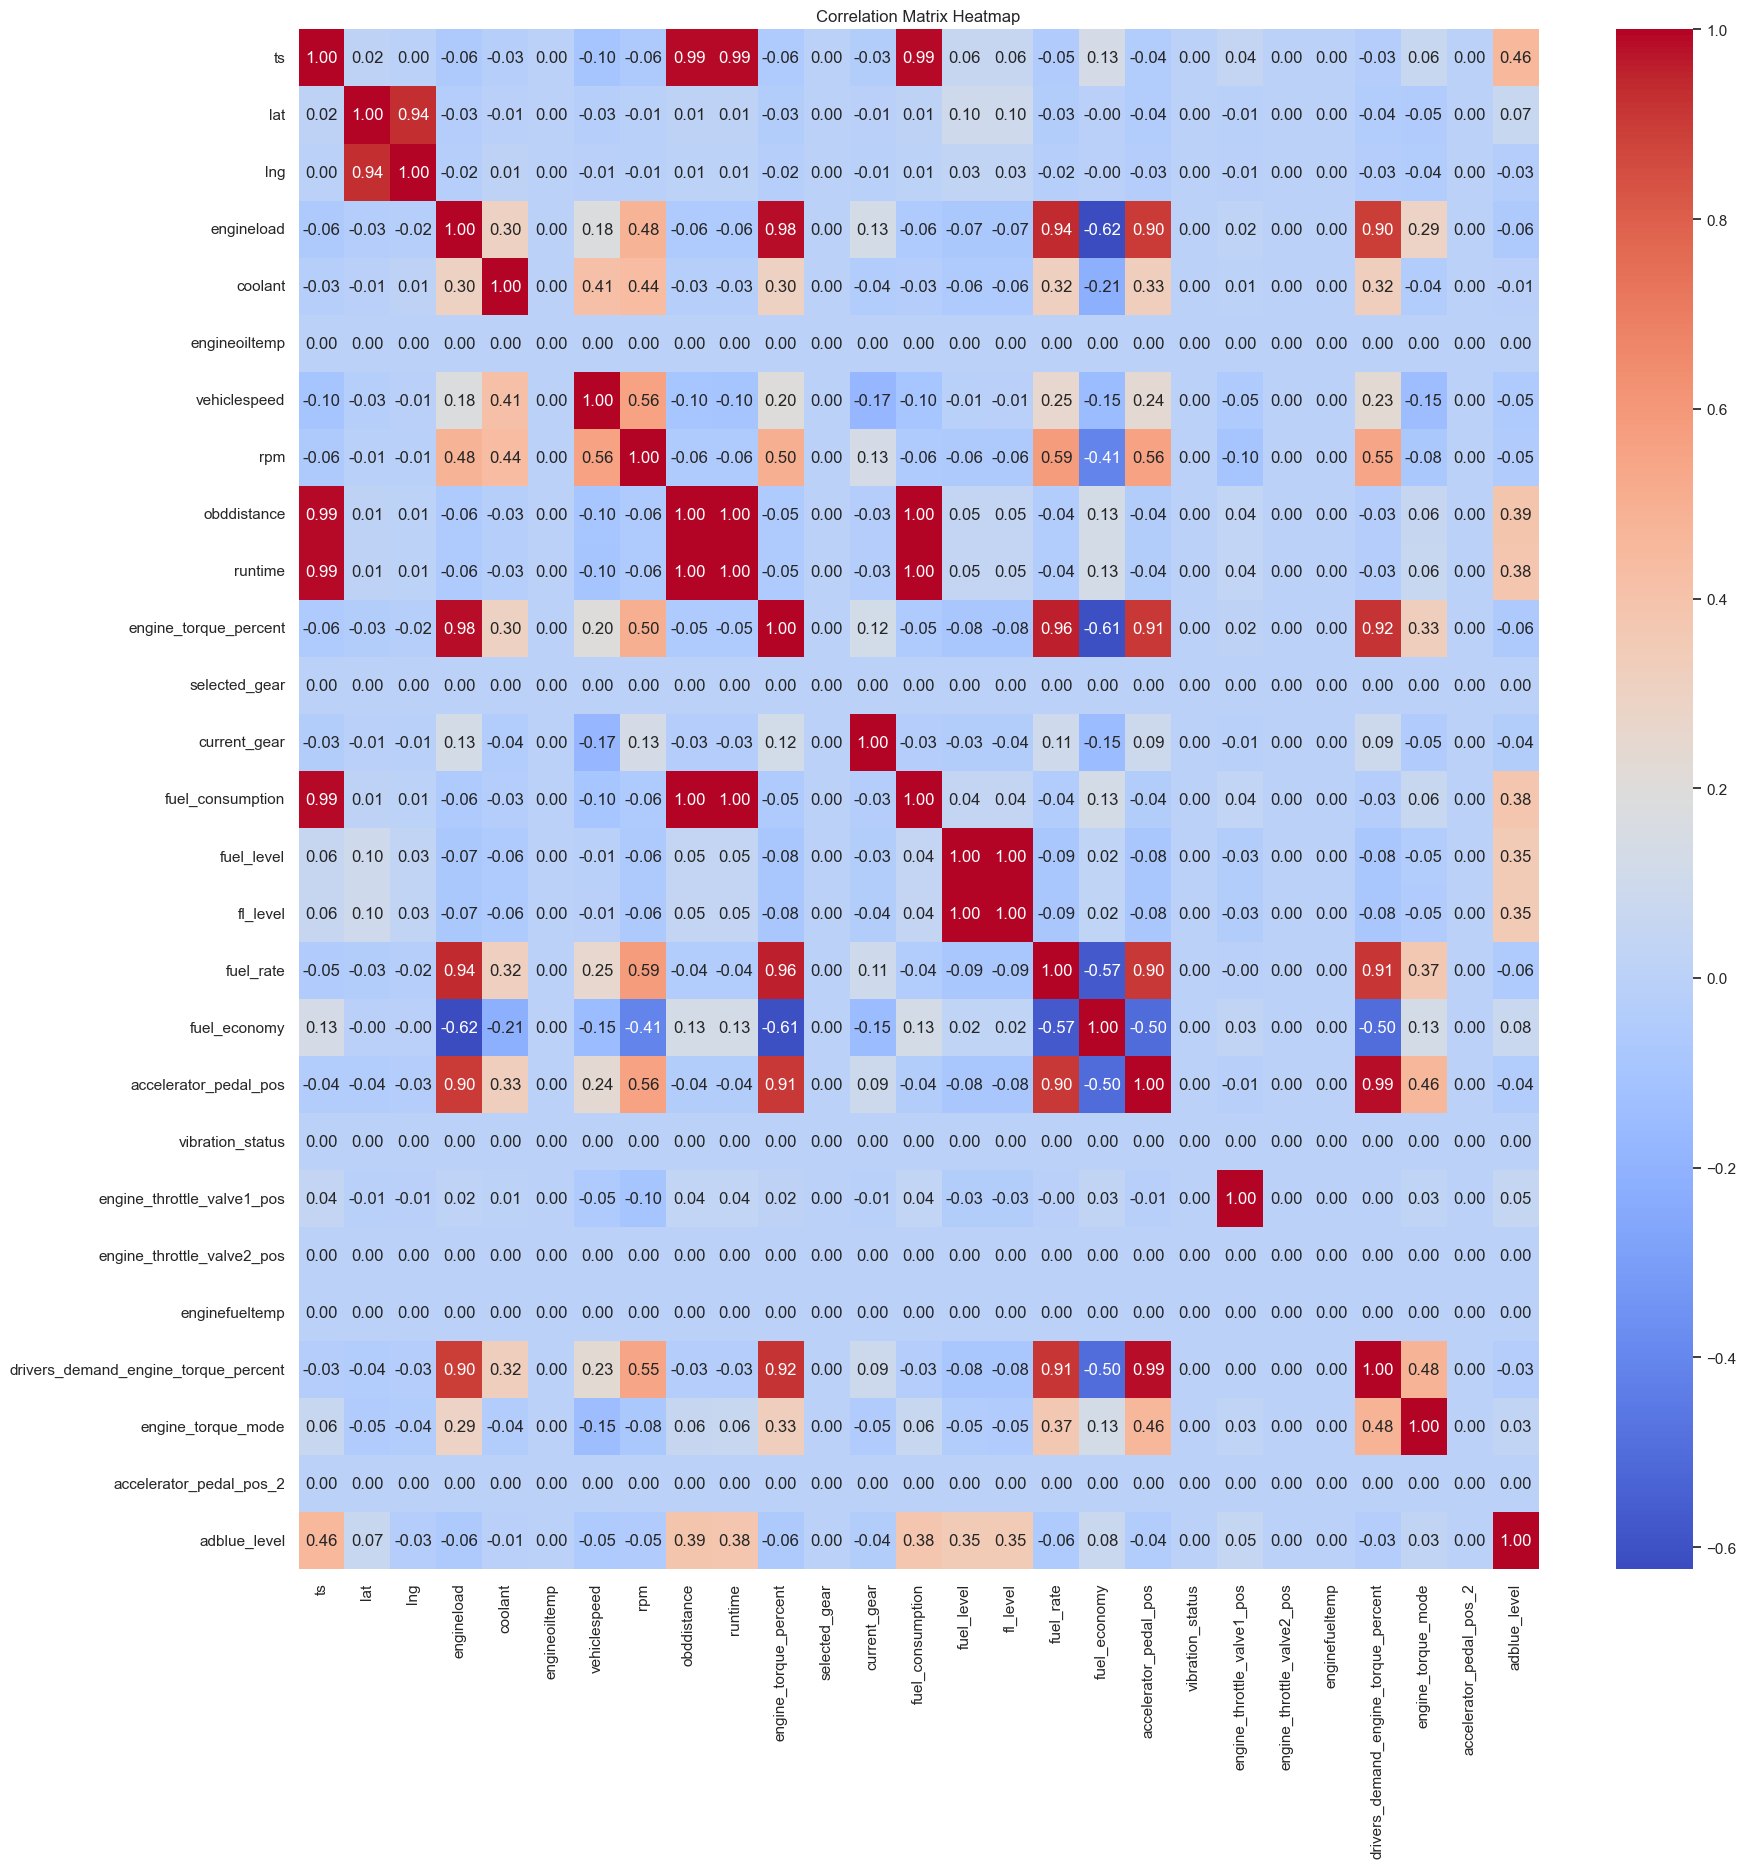

In [107]:
# Plot heatmap for graphicly describing the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Bivariate Analysis

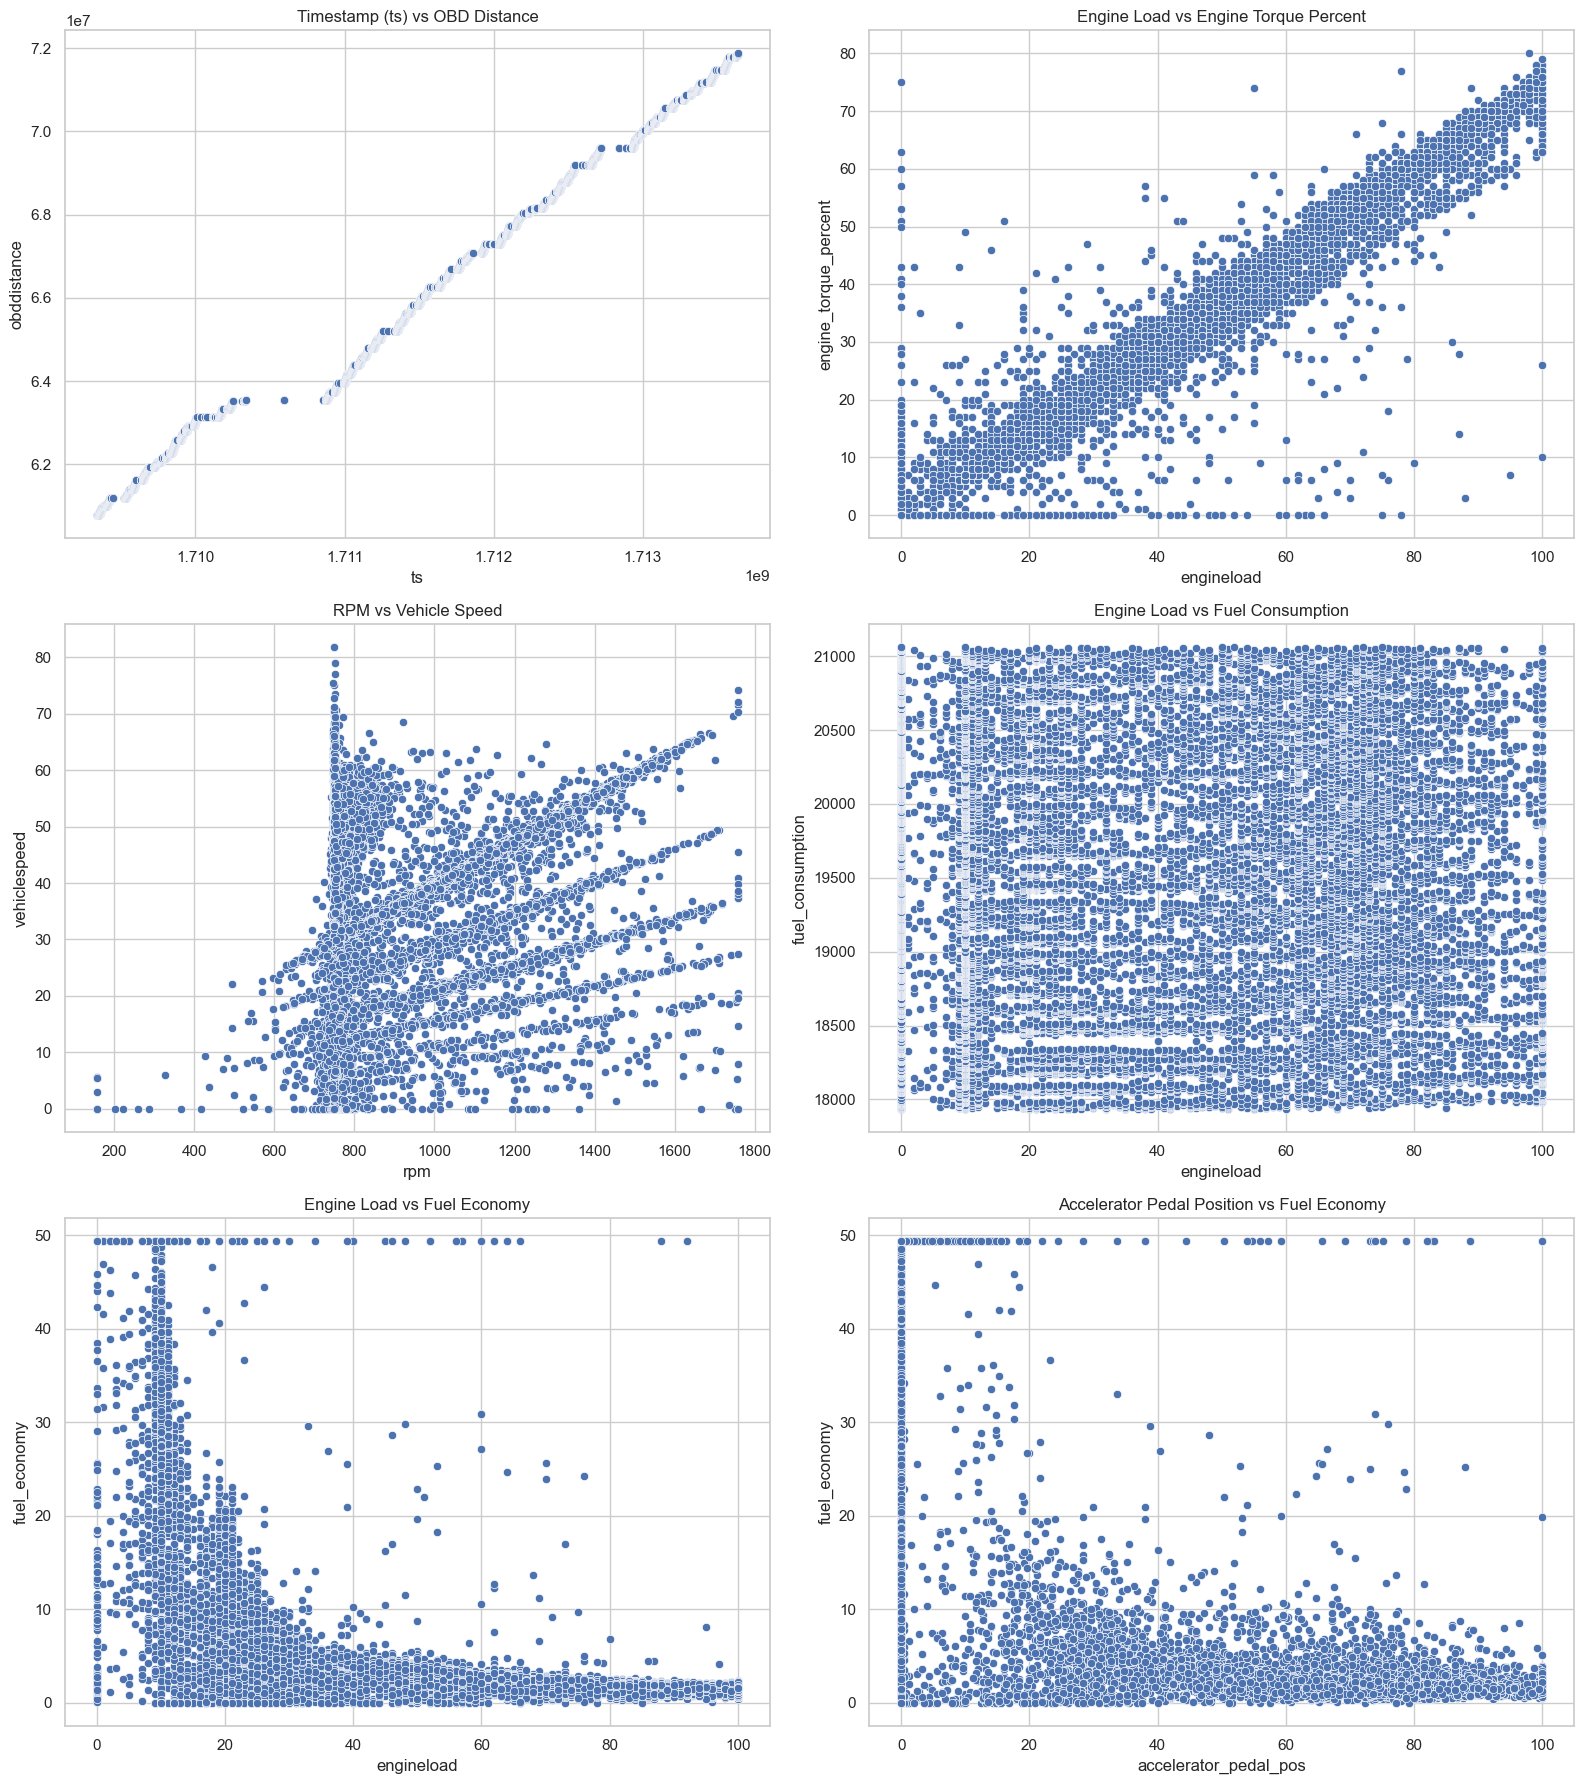

In [145]:
#Plotting the findings from the correlation matrix into scatter plots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. ts vs obddistance correlation
sns.scatterplot(x=operational_data['ts'], y=operational_data['obddistance'], ax=axes[0, 0])
axes[0, 0].set_title('Timestamp (ts) vs OBD Distance')

# 2. engineload vs engine_torque_percent correlation
sns.scatterplot(x=operational_data['engineload'], y=operational_data['engine_torque_percent'], ax=axes[0, 1])
axes[0, 1].set_title('Engine Load vs Engine Torque Percent')

# 3. rpm vs vehiclespeed correlation
sns.scatterplot(x=operational_data['rpm'], y=operational_data['vehiclespeed'], ax=axes[1, 0])
axes[1, 0].set_title('RPM vs Vehicle Speed')

# 4. fuel_consumption vs engineload correlation
sns.scatterplot(x=operational_data['engineload'], y=operational_data['fuel_consumption'], ax=axes[1, 1])
axes[1, 1].set_title('Engine Load vs Fuel Consumption')

# 5. fuel_economy vs engineload correlation
sns.scatterplot(x=operational_data['engineload'], y=operational_data['fuel_economy'], ax=axes[2, 0])
axes[2, 0].set_title('Engine Load vs Fuel Economy')

# 6. accelerator_pedal_pos vs fuel_economy correlation
sns.scatterplot(x=operational_data['accelerator_pedal_pos'], y=operational_data['fuel_economy'], ax=axes[2, 1])
axes[2, 1].set_title('Accelerator Pedal Position vs Fuel Economy')

plt.tight_layout()
plt.show()

### Plotting Box-plot to Determine outliers

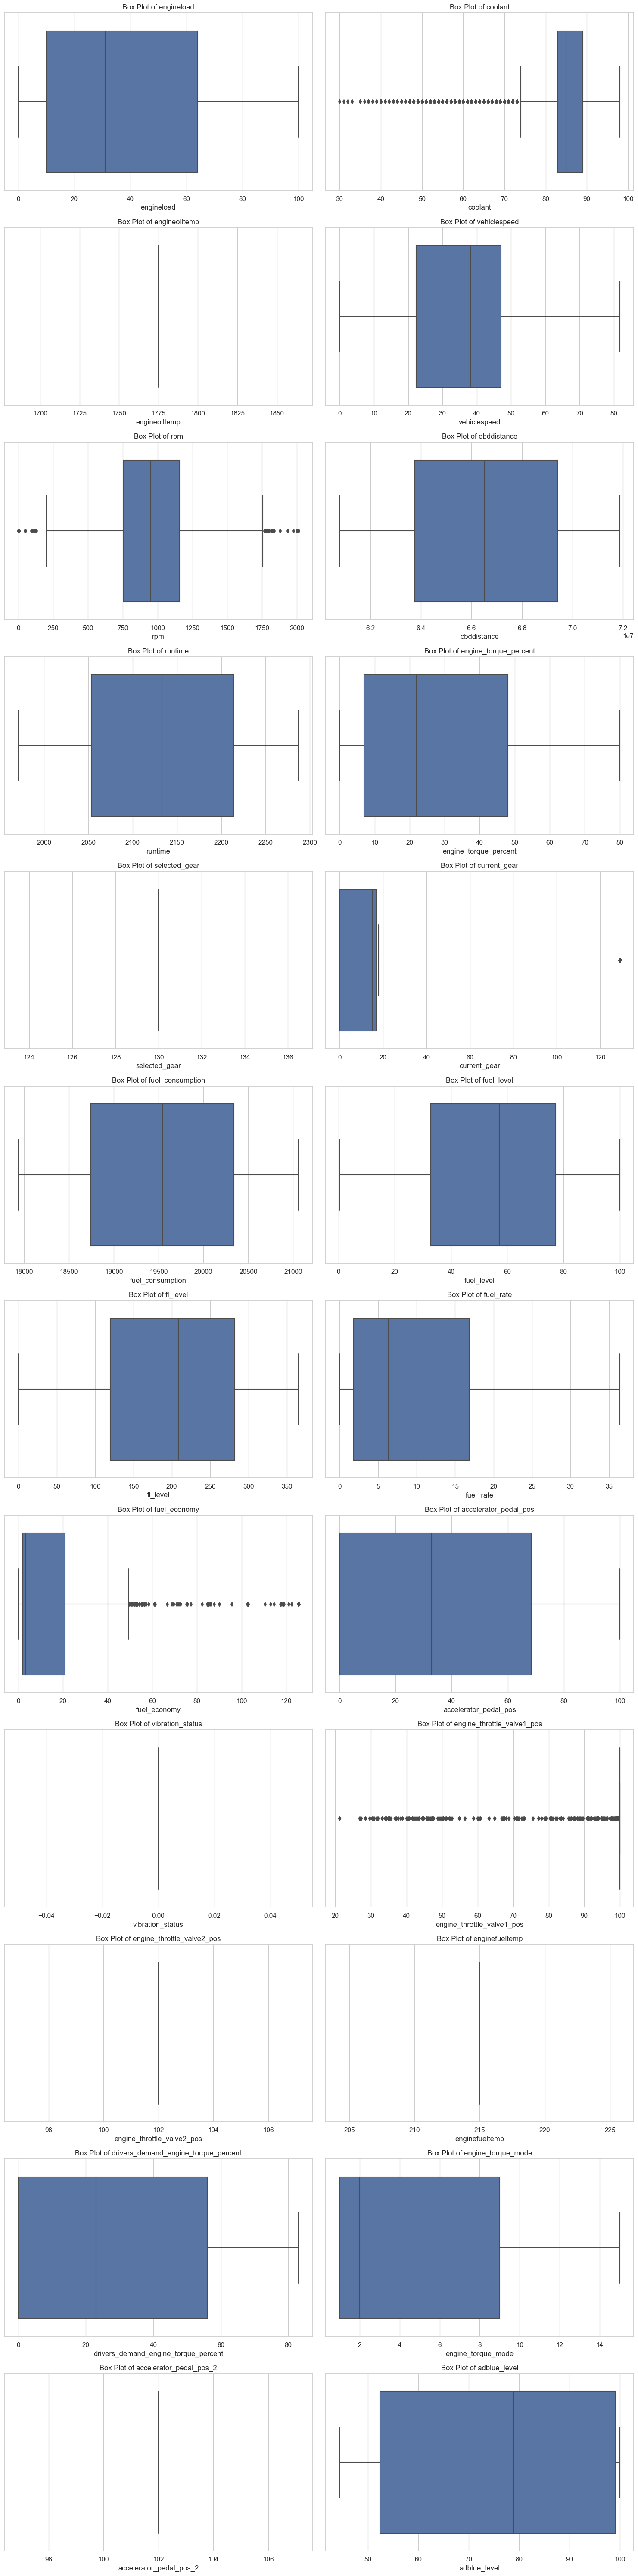

In [109]:
sns.set(style="whitegrid")

# Determine the number of columns and rows
columns_to_exclude = ['ts', 'lat', 'lng']
filtered_columns = [col for col in numerical_data.columns if col not in columns_to_exclude]

# Determine the number of columns and rows
num_plots = len(filtered_columns)
num_cols = 2  # Number of columns for the layout
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(15, num_rows * 5))  # Adjust the size as needed

for i, column in enumerate(filtered_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=numerical_data[column], orient='h')  # Horizontal box plot
    plt.title(f'Box Plot of {column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Outlier Treatment

In [110]:
#Handling the outliers adjusting those values to the 25 and 75% values of the column

# Define the whisker function to calculate lower and upper whiskers
def whisker(column_data):
    Q1 = np.percentile(column_data, 25)  # First quartile (25th percentile)
    Q3 = np.percentile(column_data, 75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lw = Q1 - 1.5 * IQR  # Lower whisker
    uw = Q3 + 1.5 * IQR  # Upper whisker

    return lw, uw


# Iterate over each filtered column to check for outliers and adjust them
for column in filtered_columns:
    # Get the lower and upper whisker for the current column
    lw, uw = whisker(operational_data[column])

    # Adjust outliers to fall within the whisker bounds
    operational_data.loc[operational_data[column] < lw, column] = lw
    operational_data.loc[operational_data[column] > uw, column] = uw



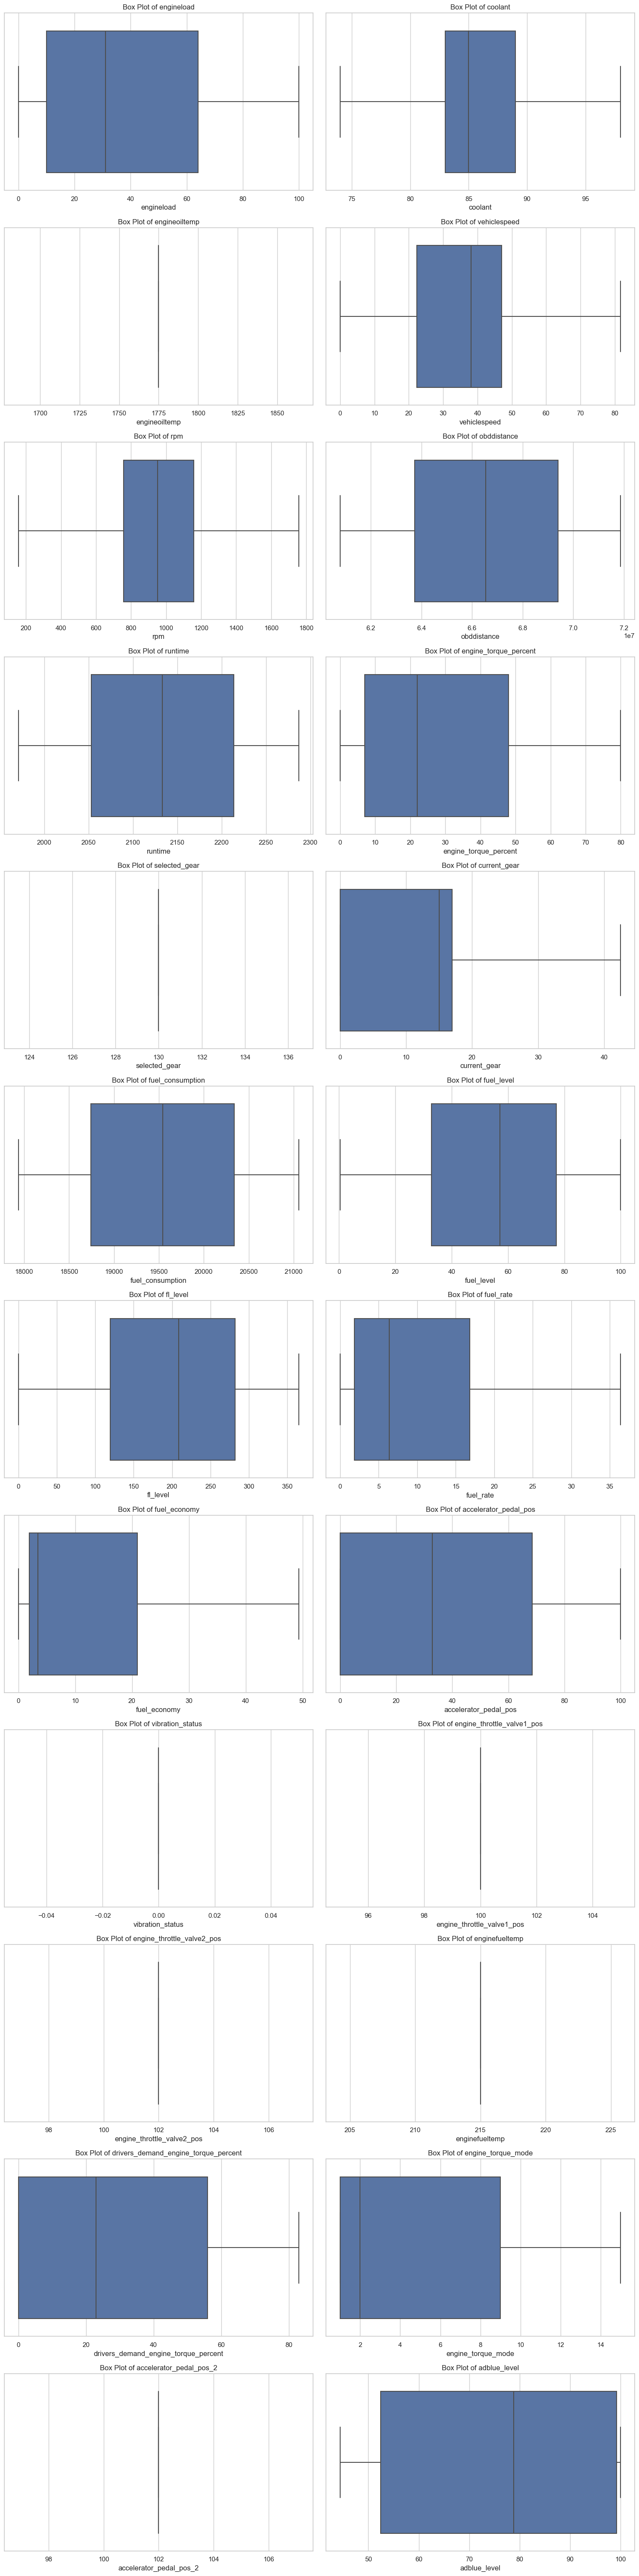

In [111]:
# Now operational_data has been updated with adjusted outliers
#Plotting box-plots again to see if are there still any outliers in the data

# Determine the number of columns and rows
num_plots = len(filtered_columns)
num_cols = 2  # Number of columns for the layout
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(15, num_rows * 5))  # Adjust the size as needed

for i, column in enumerate(filtered_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=operational_data[column], orient='h')  # Horizontal box plot
    plt.title(f'Box Plot of {column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Insights and Generating Report for the vehicle

### Report Generation

In [117]:
# Function to calculate distance between two lat/lng pairs using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c  # Distance in km
    return distance

# Calculate the distance between two readings
operational_data.loc[:, 'distance'] = haversine(
    operational_data['lat'].shift(), operational_data['lng'].shift(),
    operational_data['lat'], operational_data['lng']
)

operational_data.loc[:, 'distance'] = operational_data['distance'].fillna(0)


# Calculate total distance
total_distance = operational_data['distance'].sum()

# Calculate total fuel consumption
total_fuel_consumption = operational_data['fuel_consumption'].iloc[-1] - operational_data['fuel_consumption'].iloc[0]

# Count the number of times the parking switch is pressed
num_times_parked = (operational_data['parking_switch_status'] == 'Pressed').sum()

# Get the uniqueid (assuming there is only one unique vehicle for now)
uniqueid = operational_data['uniqueid'].iloc[0]

# Calculate the total number of low fuel instances, using .loc to avoid the warning
operational_data.loc[:, 'low_fuel'] = np.where(operational_data['fuel_level'] < 20, 1, 0)
total_num_low_fuel = operational_data['low_fuel'].sum()

# Calculate total runtime
total_runtime = operational_data['runtime'].iloc[-1] - operational_data['runtime'].iloc[0]

# Flag instances where vehiclespeed is above 60 (over-speeding)
operational_data.loc[:, 'over_speeding'] = np.where(operational_data['vehiclespeed'] > 60, 1, 0)

# Calculate the count of speeding instances
over_speeding_count = operational_data['over_speeding'].sum()

# Calculate averages
avg_adblue_level = operational_data['adblue_level'].mean()
avg_coolant = operational_data['coolant'].mean()
avg_speed = operational_data['vehiclespeed'].mean()

# Create the 'low_adblue_level' column and avoid warnings
operational_data.loc[:, 'low_adblue_level'] = np.where(operational_data['adblue_level'] < 52, 1, 0)
low_adblue_lev = operational_data['low_adblue_level'].sum()

# Create a summary DataFrame
summary = pd.DataFrame({
    'uniqueid': [uniqueid],
    'num_times_parked': [num_times_parked],
    'total_fuel_consumption': [total_fuel_consumption],
    'total_distance': [total_distance],
    'avg_adblue_level': [avg_adblue_level],
    'avg_speed': [avg_speed],
    'avg_coolant': [avg_coolant],
    'total_runtime': [total_runtime],
    'total_num_low_fuel': [total_num_low_fuel],
    'over_speeding_count': [over_speeding_count],
    'low_adblue_level': [low_adblue_lev]
})

# Output the summary DataFrame
summary

,uniqueid,num_times_parked,total_fuel_consumption,total_distance,avg_adblue_level,avg_speed,avg_coolant,total_runtime,total_num_low_fuel,over_speeding_count,low_adblue_level
0,it_220403501,1627,3123.5,170095.478967,78.35632,33.361762,85.470598,316.25,2106,318,148


In [113]:
#Instructions for report 
print(f"Units are assumed in some cases as there is no detail mention about it")

Units are assumed in some cases as there is no detail mention about it


In [118]:
#Function to Generate report of vehicle based on the summary

def generate_vehicle_report(summary):
    # Extracting data from the summary DataFrame
    vehicle_id = summary.loc[0, 'uniqueid']
    total_distance = summary.loc[0, 'total_distance']
    total_fuel_consumption = summary.loc[0, 'total_fuel_consumption']
    total_num_low_fuel = summary.loc[0, 'total_num_low_fuel']
    avg_adblue_level = summary.loc[0, 'avg_adblue_level']
    avg_coolant = summary.loc[0, 'avg_coolant']
    avg_speed = summary.loc[0, 'avg_speed']
    over_speeding_count = summary.loc[0, 'over_speeding_count']
    total_runtime = summary.loc[0, 'total_runtime']
    adblue_low = summary.loc[0,'low_adblue_level']
    num_times_parked = summary.loc[0,'num_times_parked']

    # Calculate Average Distance Travelled Per Unit
    average_distance_per_unit = total_distance / total_fuel_consumption  # Adjust if needed

    # Generate the report
    report = f"""
!-------- Vehicle Report --------!

Vehicle Statistics
-----------------
Vehicle ID: {vehicle_id}
Distance Travelled: {total_distance:.2f} km
Fuel Consumed: {total_fuel_consumption} liters
Run-Time: {total_runtime} hrs
Average Distance Travelled Per Unit: {average_distance_per_unit:.2f} km
Average Ad Blue Level: {avg_adblue_level:.2f}
Average Coolant: {avg_coolant:.2f}
Average Speed: {avg_speed:.2f} units
Number of time Vehicle is Parked: {num_times_parked}

Warnings
--------
Vehicle has been marked 'Over Speeding' {over_speeding_count} times
Vehicle had 'Low Fuel' at {total_num_low_fuel} times
Vehicle had 'Low AdBlue Levels' at {adblue_low} times
"""

    print(report)


### Final Report

In [119]:
# Generate Vehicle Report by passing the summary
generate_vehicle_report(summary)


!-------- Vehicle Report --------!

Vehicle Statistics
-----------------
Vehicle ID: it_220403501
Distance Travelled: 170095.48 km
Fuel Consumed: 3123.5 liters
Run-Time: 316.25 hrs
Average Distance Travelled Per Unit: 54.46 km
Average Ad Blue Level: 78.36
Average Coolant: 85.47
Average Speed: 33.36 units
Number of time Vehicle is Parked: 1627

Warnings
--------
Vehicle has been marked 'Over Speeding' 318 times
Vehicle had 'Low Fuel' at 2106 times
Vehicle had 'Low AdBlue Levels' at 148 times

